# 作業 : (Kaggle)房價預測

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from copy import deepcopy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path = 'data/data2/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [2]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [3]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


# 作業1
* 試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

In [4]:
# 顯示 1stFlrSF 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df['1stFlrSF'][:train_num], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

/anaconda3/envs/python3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 640x480 with 1 Axes>

/anaconda3/envs/python3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8465891287364509

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64


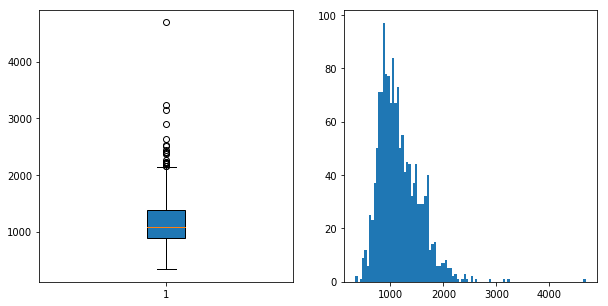

In [5]:
print(df['1stFlrSF'].describe())
fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(10)
ax[0].boxplot(x=df['1stFlrSF'], patch_artist=True)
ax[1].hist(x=df['1stFlrSF'], bins=100)
plt.show()

In [6]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 調整離群值
"""
Your Code Here
"""
clip_df = deepcopy(df)
clip_df['1stFlrSF'] = clip_df['1stFlrSF'].clip(lower=df['1stFlrSF'].min(), upper=df['1stFlrSF'].quantile(q=.95))
# 做線性迴歸, 觀察分數
clip_train_X = MMEncoder.fit_transform(clip_df)
estimator = LinearRegression()
cross_val_score(estimator, clip_train_X, train_Y, cv=5).mean()

/anaconda3/envs/python3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8702091739386045

# 作業2
* 續前題, 去除離群值有兩類方式 :  捨棄離群值(刪除離群的資料) 以及調整離群值,  
請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。

In [8]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 捨棄離群值
"""
Your Code Here
"""
_filter = (df['1stFlrSF'] > df['1stFlrSF'].min()) & (df['1stFlrSF'] < df['1stFlrSF'].quantile(q=.95))
filter_df = df[_filter]
filter_train_Y = train_Y[_filter]
# 做線性迴歸, 觀察分數
filter_train_X = MMEncoder.fit_transform(filter_df)
estimator = LinearRegression()
cross_val_score(estimator, filter_train_X, filter_train_Y, cv=5).mean()

/anaconda3/envs/python3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8792137144236142

### Table 1:

In [9]:
drop_mean = df[~_filter].mean()
drop_std = df[~_filter].std()
drop_data = {col: [mean_val, std_val] for col, mean_val, std_val in zip(drop_mean.index, drop_mean.values, drop_std.values)}
pd.DataFrame(drop_data, index=['mean', 'std'])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
mean,31.081081,84.500000,18285.540541,7.891892,5.310811,1988.243243,1996.067568,298.256757,977.472973,72.162162,...,707.378378,163.959459,74.905405,17.216216,8.027027,11.864865,13.986486,0.0,6.202703,2007.810811
std,22.180305,54.417274,24794.620070,1.575215,1.045875,21.284640,15.383972,312.406350,856.987735,213.605066,...,229.211316,162.181569,76.105401,57.850604,48.504758,45.176465,84.719439,0.0,2.946927,1.401327


### Table 2:

In [10]:
keep_mean = df[_filter].mean()
keep_std = df[_filter].std()
keep_data = {col: [mean_val, std_val] for col, mean_val, std_val in zip(keep_mean.index, keep_mean.values, keep_std.values)}
pd.DataFrame(keep_data, index=['mean', 'std'])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
mean,58.275613,56.001443,10102.048341,6.003608,5.589466,1970.361472,1984.267677,92.692641,415.137807,45.181818,...,460.465368,90.522367,45.152237,22.207071,3.163059,15.231602,2.159452,45.810967,6.328283,2007.816017
std,42.679045,33.018887,8315.563927,1.305081,1.114851,30.345637,20.723653,164.689957,405.451675,158.027015,...,205.653785,122.021640,65.377553,61.298286,27.932476,56.274769,36.263832,509.099860,2.691024,1.324603


### Larger than quantile 0.99: 

In [17]:
df[df['1stFlrSF'] >= df['1stFlrSF'].quantile(q=.99)]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
70,20,95.0,13651,7,6,1973,1973,1115.0,1880,0,...,516,300,0,0,0,0,0,0,2,2007
113,20,-1.0,21000,6,5,1953,1953,184.0,35,869,...,450,166,120,192,0,0,0,0,10,2007
178,20,63.0,17423,9,5,2008,2009,748.0,1904,0,...,1166,0,60,0,0,0,0,0,7,2009
224,20,103.0,13472,10,5,2003,2003,922.0,56,0,...,968,248,105,0,0,0,0,0,6,2009
440,20,105.0,15431,10,5,2008,2008,200.0,1767,539,...,672,0,72,0,0,170,0,0,4,2009
496,20,-1.0,12692,8,5,1992,1993,0.0,1231,0,...,546,264,75,291,0,0,0,0,5,2007
523,60,130.0,40094,10,5,2007,2008,762.0,2260,0,...,884,208,406,0,0,0,0,0,10,2007
529,20,-1.0,32668,6,3,1957,1975,-1.0,1219,0,...,484,0,0,200,0,0,0,0,3,2007
691,60,104.0,21535,10,6,1994,1995,1170.0,1455,0,...,832,382,50,0,0,0,0,0,1,2007
898,20,100.0,12919,9,5,2009,2010,760.0,2188,0,...,820,0,67,0,0,0,0,0,3,2010


Answer: 由table1與table2可知，大於百分位數95%的值，各變數標準差明顯大於百分位數小於等於95%的資料，表示資料間變動很大，再列出變數`1stFlrSF`百分位數大於99%的資料，可以看出百分位數大於99%的資料中的各變數內有明顯大於平均數與中位數的值，因此就算改變了變數`1stFlrSF`的值域，此筆資料的其他變數相對於百分位數小於等於95%資料來說仍為離群值，因此捨棄離群值的方法在多數情況下會優於調整離群值的方法。